In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
from datetime import datetime, date
import json
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

In [2]:
# Select modeling domain
domain = 'CHUK'
# data location
datapath = '/nfs/attic/dfh/2020_NPRB/data/'
# SM forcing files 
SMdatapath = datapath+'SMinputs/'+domain+'/'
# dem tif
demtif = SMdatapath+domain+'_dem.tif'

# historical ET data - na
path_hist = '/nfs/attic/dfh/data/climate_na_et/Normal_1991_2020_monthly/'
# future ET data - na
path_fut = '/nfs/attic/dfh/data/climate_na_et/ensemble_8GCMs_ssp585_2071_2100/'
# historical ET data - domain
path_hist_out = datapath+'climate_na_et/Normal_1991_2020_monthly/'+domain+'/'
# future ET data - domain
path_fut_out = datapath+'climate_na_et/ensemble_8GCMs_ssp585_2071_2100/'+domain+'/'

In [3]:
#historic monthly data
histpath = path_hist_out+'monthly_climatena_dif.nc'
datah = xr.open_dataset(histpath)
datah

<xarray.Dataset>
Dimensions:  (month: 14, y: 39, x: 38)
Coordinates:
  * month    (month) float64 0.5 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0 12.5
  * y        (y) float64 2.187e+06 2.164e+06 2.142e+06 ... 1.365e+06 1.343e+06
  * x        (x) float64 -7.659e+05 -7.437e+05 -7.215e+05 ... 3.33e+04 5.55e+04
Data variables:
    tav_dif  (month, y, x) float64 ...
    tmx_dif  (month, y, x) float64 ...
    tmn_dif  (month, y, x) float64 ...
    pr_dif   (month, y, x) float64 ...

In [4]:
# create date timeseries with the date of the middle day of each month 
dateslist = ['12-15-2005','1-15-2006','2-15-2006','3-15-2006','4-15-2006','5-15-2006','6-15-2006',
'7-15-2006','8-15-2006','9-15-2006','10-15-2006','11-15-2006','12-15-2006','1-15-2007']
dates = [datetime.strptime(val, '%m-%d-%Y') for val in dateslist]

In [5]:
# def mon2day(datain,var):
#     # interpolate monthly et for each pixel
#     datadaily = np.empty([365,len(datah.y),len(datah.x)])

#     for i in range(len(datain.y)):
#         for j in range(len(datain.x)):
#             datapx = datain[var].isel(x=j,y=i)
#             if np.isnan(np.sum(datapx)) == True:
#                 datadaily[:,i,j] = [np.nan]*365
#             else:
#                 df = pd.DataFrame({'time': dates, 'et': datapx})
#                 df = df.set_index('time').resample('D').interpolate(method ='polynomial',order=2)
#                 datadaily[:,i,j] = df.et.values
                
#     return datadaily

In [6]:
var = 'tav_dif'
# interpolate monthly et for each pixel
datadaily = np.empty([397,len(datah.y),len(datah.x)])
for i in range(len(datah.y)):
    for j in range(len(datah.x)):
        datapx = datah[var].isel(x=j,y=i)
        if np.isnan(np.sum(datapx)) == True:
            datadaily[:,i,j] = [np.nan]*397
        else:
            df = pd.DataFrame({'time': dates, 'data': datapx})
            df = df.set_index('time').resample('D').interpolate(method ='polynomial',order=2)
            datadaily[:,i,j] = df.data.values
# build xarray data array to save out
datady = xr.DataArray(
    datadaily,
    coords={
        "time":df.index.values,
        "y": datah.y.values,
        "x": datah.x.values,
    },
    dims=["time","y", "x"],
)
# convert to dataset
ds=datady.to_dataset(name = var)
ds

<xarray.Dataset>
Dimensions:  (time: 397, y: 39, x: 38)
Coordinates:
  * time     (time) datetime64[ns] 2005-12-15 2005-12-16 ... 2007-01-15
  * y        (y) float64 2.187e+06 2.164e+06 2.142e+06 ... 1.365e+06 1.343e+06
  * x        (x) float64 -7.659e+05 -7.437e+05 -7.215e+05 ... 3.33e+04 5.55e+04
Data variables:
    tav_dif  (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 7.0 6.7 6.4 6.2 6.1

In [7]:
var = 'tmx_dif'
# interpolate monthly et for each pixel
datadaily = np.empty([397,len(datah.y),len(datah.x)])
for i in range(len(datah.y)):
    for j in range(len(datah.x)):
        datapx = datah[var].isel(x=j,y=i)
        if np.isnan(np.sum(datapx)) == True:
            datadaily[:,i,j] = [np.nan]*397
        else:
            df = pd.DataFrame({'time': dates, 'data': datapx})
            df = df.set_index('time').resample('D').interpolate(method ='polynomial',order=2)
            datadaily[:,i,j] = df.data.values
ds[var] = (['time','y', 'x'], datadaily )

var = 'tmn_dif'
# interpolate monthly et for each pixel
datadaily = np.empty([397,len(datah.y),len(datah.x)])
for i in range(len(datah.y)):
    for j in range(len(datah.x)):
        datapx = datah[var].isel(x=j,y=i)
        if np.isnan(np.sum(datapx)) == True:
            datadaily[:,i,j] = [np.nan]*397
        else:
            df = pd.DataFrame({'time': dates, 'data': datapx})
            df = df.set_index('time').resample('D').interpolate(method ='polynomial',order=2)
            datadaily[:,i,j] = df.data.values
ds[var] = (['time','y', 'x'], datadaily )

var = 'pr_dif'
# interpolate monthly et for each pixel
datadaily = np.empty([397,len(datah.y),len(datah.x)])
for i in range(len(datah.y)):
    for j in range(len(datah.x)):
        datapx = datah[var].isel(x=j,y=i)
        if np.isnan(np.sum(datapx)) == True:
            datadaily[:,i,j] = [np.nan]*397
        else:
            df = pd.DataFrame({'time': dates, 'data': datapx})
            df = df.set_index('time').resample('D').interpolate(method ='polynomial',order=2)
            datadaily[:,i,j] = df.data.values
ds[var] = (['time','y', 'x'], datadaily )

In [8]:
# select 1 year
ds=ds.sel(time=slice('2006-01-01','2006-12-31'))
ds

<xarray.Dataset>
Dimensions:  (time: 365, y: 39, x: 38)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2006-12-31
  * y        (y) float64 2.187e+06 2.164e+06 2.142e+06 ... 1.365e+06 1.343e+06
  * x        (x) float64 -7.659e+05 -7.437e+05 -7.215e+05 ... 3.33e+04 5.55e+04
Data variables:
    tav_dif  (time, y, x) float64 0.0 0.0 0.0 0.0 ... 7.054 6.823 6.615 6.416
    tmx_dif  (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 6.591 6.327 6.211 6.04
    tmn_dif  (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 7.46 7.209 6.995 6.861
    pr_dif   (time, y, x) float64 1.0 1.0 1.0 1.0 1.0 ... 1.635 1.713 1.753 1.8

In [9]:
# save as netcdf
path = path_hist_out+'daily_climatena_dif.nc'
ds.to_netcdf(path)

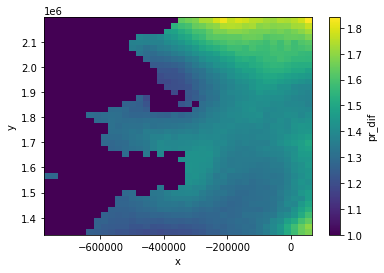

In [10]:
ds.pr_dif.mean(dim='time').plot()

In [11]:
ds=xr.open_dataset(path_hist_out+'daily_climatena_dif.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 365, y: 39, x: 38)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2006-12-31
  * y        (y) float64 2.187e+06 2.164e+06 2.142e+06 ... 1.365e+06 1.343e+06
  * x        (x) float64 -7.659e+05 -7.437e+05 -7.215e+05 ... 3.33e+04 5.55e+04
Data variables:
    tav_dif  (time, y, x) float64 ...
    tmx_dif  (time, y, x) float64 ...
    tmn_dif  (time, y, x) float64 ...
    pr_dif   (time, y, x) float64 ...

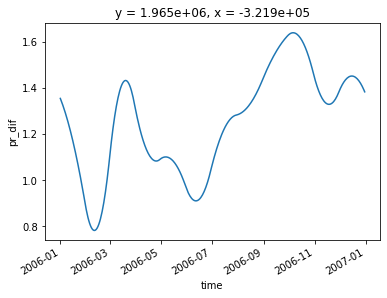

In [12]:
ds.pr_dif.isel(y=10,x=20).plot()

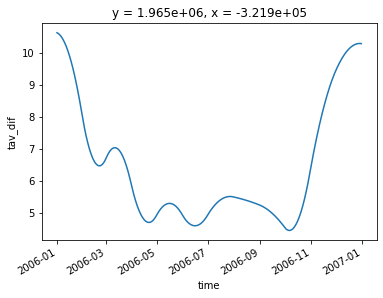

In [13]:
ds.tav_dif.isel(y=10,x=20).plot()

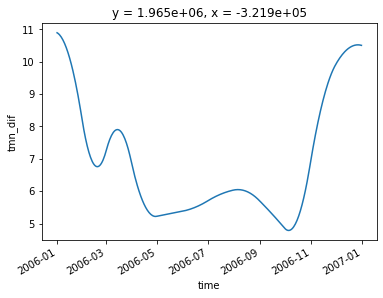

In [14]:
ds.tmn_dif.isel(y=10,x=20).plot()

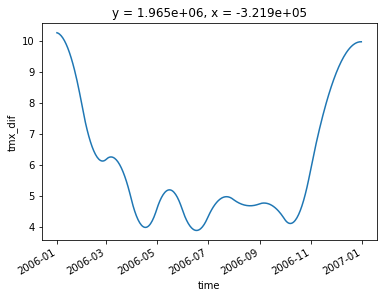

In [15]:
ds.tmx_dif.isel(y=10,x=20).plot()

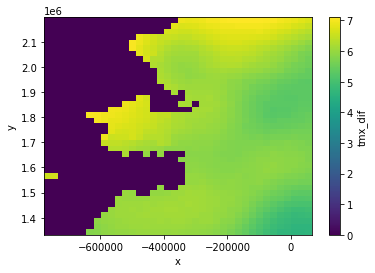

In [16]:
ds.tmx_dif.mean(dim='time').plot()